<a href="https://colab.research.google.com/github/tazar09/heroes_3/blob/main/h3_castles%5Boct06%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [2]:
pip install adjusttext

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from adjustText import adjust_text

# Getting the data from the website

In [4]:
list_of_castles = ['Castle', 'Rampart', 'Tower', 'Inferno', 'Necropolis', 'Dungeon', 'Stronghold', 'Fortress', 'Conflux']
url = 'https://heroes.thelazy.net/index.php/'

In [5]:
url_castles = []
for x in list_of_castles:
  url_castles.append(url + x)
url_castles

['https://heroes.thelazy.net/index.php/Castle',
 'https://heroes.thelazy.net/index.php/Rampart',
 'https://heroes.thelazy.net/index.php/Tower',
 'https://heroes.thelazy.net/index.php/Inferno',
 'https://heroes.thelazy.net/index.php/Necropolis',
 'https://heroes.thelazy.net/index.php/Dungeon',
 'https://heroes.thelazy.net/index.php/Stronghold',
 'https://heroes.thelazy.net/index.php/Fortress',
 'https://heroes.thelazy.net/index.php/Conflux']

In [6]:
dfs = []
for i, x in enumerate(url_castles):
  match_castle = str(list_of_castles[i]) + ' ' + 'creatures'
  df = pd.read_html(x, match = match_castle)
  dfs.append(df)

# Castles

1. Castle

In [7]:
df_castle = pd.DataFrame(dfs[0][0])
df_castle.columns = df_castle.columns.droplevel()
df_castle['Town'] = 'Castle'

2. Rampart

In [8]:
df_rampart = pd.DataFrame(dfs[1][0])
df_rampart.columns = df_rampart.columns.droplevel()
df_rampart['Town'] = 'Rampart'

3. Tower

In [9]:
df_tower = pd.DataFrame(dfs[2][0])
df_tower.columns = df_tower.columns.droplevel()
df_tower['Town'] = 'Tower'

4. Inferno

In [10]:
df_inferno = pd.DataFrame(dfs[3][0])
df_inferno.columns = df_inferno.columns.droplevel()
df_inferno['Town'] = 'Inferno'

5. Necropolis

In [11]:
df_necropolis = pd.DataFrame(dfs[4][0])
df_necropolis.columns = df_necropolis.columns.droplevel()
df_necropolis['Town'] = 'Necropolis'

6. Dungeon

In [12]:
df_dungeon = pd.DataFrame(dfs[5][0])
df_dungeon.columns = df_dungeon.columns.droplevel()
df_dungeon['Town'] = 'Dungeon'
# df_dungeon.drop('', axis = 1, inplace = True)

7. Stronghold

In [13]:
url2 = 'https://heroes.thelazy.net/index.php/Stronghold'
df_stronghold = pd.read_html(url2, match = 'Fortress creatures')
df_stronghold = pd.DataFrame(df_stronghold[0])
df_stronghold.columns = df_stronghold.columns.droplevel()
df_stronghold['Town'] = 'Stronghold'

8. Fortress

In [14]:
df_fortress = pd.DataFrame(dfs[7][0])
df_fortress.columns = df_fortress.columns.droplevel()
df_fortress['Town'] = 'Fortress'

9. Conflux

In [15]:
df_conflux = pd.DataFrame(dfs[8][0])
df_conflux.columns = df_conflux.columns.droplevel()
df_conflux['Town'] = 'Conflux'

10. Cove

In [16]:
url2 = 'https://heroes.thelazy.net/index.php/Cove'
df_cove = pd.read_html(url2, match = 'Cove creatures')
df_cove = pd.DataFrame(df_cove[0])
df_cove.columns = df_cove.columns.droplevel()
df_cove['Town'] = 'Cove'
df_cove.loc[6, 'Lvl'] = "3+"
#exclusion of first level 3 creature for uniformization
df_cove.drop(index = 4, axis = 0, inplace = True)
df_cove = df_cove.reset_index(drop = True)
df_cove.loc[4, 'Lvl'] = '3'
# df_cove.head(20)

# Generating cumsum column

Generating the column with cumulative Values for Upgraded Creatures.

In [17]:
def cumsum(df):
  df['val_temp'] = df.index % 2 * df['Val']
  df['cum_val'] = df['val_temp'].cumsum()
  df = df.drop('val_temp', axis =1, inplace=True)
  return df

In [18]:
for df in [df_castle, df_rampart, df_tower, df_inferno, df_necropolis, df_dungeon, df_stronghold, df_fortress, df_conflux, df_cove]:
  cumsum(df)

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Concatenation of castles

All castles joined

In [19]:
df_towns = pd.concat([df_castle, df_rampart, df_tower, df_inferno, df_necropolis, df_dungeon, df_stronghold, df_fortress, df_conflux, df_cove] , axis = 0)

Preprocessing

In [20]:
df_towns['Level'] = df_towns['Lvl'].str.replace('+', '.5').str.replace('*', '')
df_towns['Level'] = df_towns['Level'].astype(float)
df_towns.drop('Lvl', axis = 1, inplace = True)

In [21]:
df = df_towns[['Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Grw', 'Val','cum_val','Cost', 'Unnamed: 12_level_1', 'Special']]
df['Unnamed: 12_level_1'] = df['Unnamed: 12_level_1'].fillna('0')
df['Special'] = df['Special'].fillna('No')
df = df.rename(columns={'Unnamed: 12_level_1':'Resource'})
df['Resource'] = df['Resource'].str.get(-1).astype(int)
df['Ranged'] = df['Special'].apply(lambda x:
                                   1 if 'Ranged' in x else
                                   0)
df['Flyer'] = df['Special'].apply(lambda x:
                                  1 if 'Fly' in x or 'Teleporting' in x or 'Teleport' in x else
                                  0)
df['no_retaliation'] = df['Special'].apply(lambda x:
                                           1 if 'No enemy retaliation' in x else
                                           (0.2 if any(s in x for s in ['Petrify', 'Paralyze']) else
                                           0))
df['Upgraded'] = df['Level'].apply(lambda x:
                                   1 if ((x / 0.5)%2 == 1) else
                                   0)

________________________________________________________________________________________________________________________________

# Checking for AI and Fight values

Adding AI value and Fight Value

In [101]:
path_sod = '/content/h3_ai_value_sod.xlsx'
path_hoa = '/content/h3_ai_value_hoa.xlsx'

df_ai_value_sod = pd.read_excel(path_sod)
df_ai_value_hoa = pd.read_excel(path_hoa)

In [102]:
df_ai_value_sod['Creature'] = df_ai_value_sod['Creature'].str.strip()
df_ai_value_hoa['Creature'] = df_ai_value_hoa['Creature'].str.strip()
df = df.merge(df_ai_value_hoa, how = 'left', left_on = 'Name', right_on = 'Creature')

In [103]:
df.tail(5)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Special,Ranged,Flyer,no_retaliation,Upgraded,dmg,attdef,Creature,AI Value,Fight Value
135,Sorceress,Cove,5.5,12,9,10,16,35,7,3,...,"Ranged (12 shots), Casts Weakness / Disrupting...",1,0,0.0,1,13.0,10.5,Sorceress,852,655
136,Nix,Cove,6.0,13,16,18,22,80,6,2,...,Ignores 30% of enemy attack value,0,0,0.0,0,20.0,14.5,Nix,1415,1415
137,Nix Warrior,Cove,6.5,14,17,18,22,90,7,2,...,Ignores 60% of enemy attack value,0,0,0.0,1,20.0,15.5,Nix Warrior,2116,1763
138,Sea Serpent,Cove,7.0,22,16,30,55,180,9,1,...,Poisonous,0,0,0.0,0,42.5,19.0,Sea Serpent,3953,3162
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,"Poisonous, Revenge",0,0,0.0,1,42.5,24.5,Haspid,7220,5554


_________________________________________________________________________________________________________________

We used Horn of the Abyss Ai value and Fight Value, because Shadow of Death did not have records for Cove units. However, we displayed the differences in the following lines.

In [104]:
df_merged = df_ai_value_sod.merge(df_ai_value_hoa, on = 'Creature', how = 'left')

In [105]:
df_merged['AI_dif'] = df_merged['AI Value_y'] - df_merged['AI Value_x']
df_merged['Fight_dif'] = df_merged['Fight Value_y'] - df_merged['Fight Value_x']
df_diff = df_merged[(df_merged['AI_dif'] != 0) | (df_merged['Fight_dif'] != 0)].head(500)

In [106]:
df_diff.head(20)

,Creature,AI Value_x,Fight Value_x,AI Value_y,Fight Value_y,AI_dif,Fight_dif
3,Faerie Dragon,19580,16317,30501,16317,10921,0
17,Firebird,4547,3248,4336,3097,-211,-151
30,Efreet Sultan,1848,1584,2343,1802,495,218
76,Monk,485,485,582,485,97,0
93,Nomad,345,285,345,415,0,130


In [107]:
print('There were only {} differences. There where {} neutral creatures, and {} factions\' creatures. \nRegarding the towns\' changes, we note the {}, {} and {}.\nSo, we will keep the HoA scores.' \
      .format(df_diff.shape[0], df_diff.loc[[3,93]].shape[0], df_diff.loc[[17,30,76]].shape[0], df_diff.loc[17, 'Creature'], df_diff.loc[30, 'Creature'], df_diff.loc[76, 'Creature']))

There were only 5 differences. There where 2 neutral creatures, and 3 factions' creatures. 
Regarding the towns' changes, we note the Firebird, Efreet Sultan and Monk.
So, we will keep the HoA scores.


________________________________________________________________________________________________________

# Clean df - starting point

In [108]:
df0 = df.drop(['Creature'], axis = 1)

In [109]:
df0.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,dmg,attdef,AI Value,Fight Value
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,0,Immune to jousting,0,0,0.0,0,2.0,4.5,80,100
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,0,Immune to jousting,0,0,0.0,1,2.5,5.5,115,115
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,0,Ranged (12 shots),1,0,0.0,0,2.5,4.5,126,115
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,0,"Ranged (24 shots), Double attack",1,0,0.0,1,2.5,4.5,184,115
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,0,"Flying, Two retaliations",0,1,0.0,0,4.5,8.0,351,324


In [110]:
df = df0.copy()

End of first part: df0 is the starting dataframe

_____________


___________

__________________________________________________________________________________________________________________________________________________________

# Enhancing the df with new columns

PART II - Preprocessing and enhancing the data

Enhancing the data with special ability modelling: multiple attacks, magic immunity/resistance, spell casting etc.

1. Multiple attacks column

In [111]:
df['multi_att'] = df['Special'].apply(lambda x:
                                      1 if 'Double attack' in x or 'Ferocity' in x else
                                      0.5 if 'all adjacent' in x else
                                      0.3 if any(item in x for item in ['Breath attack', '3-headed attack', 'Death blow', 'Unlimited', 'Fireball attack', 'Death cloud'])
                                      else 0)

Checking the results


In [112]:
words = ['Double', 'Breath', 'Ferocity', 'adjacent', '3-headed', 'Death blow', 'Unlimited', 'Fireball attack', 'Death cloud']
pattern = '|'.join(words)
mask = df['Special'].str.contains(pattern)
# df[mask]

___________________________________________________________________________
2. Poisonous, aging, disease and similar effects.


In [113]:
df['poison'] = df['Special'].apply(lambda x:
                                      1 if 'Poison' in x or 'Disease' in x or 'Aging' in x
                                      else 0)

Checking the results.

In [114]:
words_poison = ['Poison', 'Disease', 'Aging']
pattern_poison = '|'.join(words_poison)
mask = df['Special'].str.contains(pattern_poison)
# df[mask]

___________________________________________________________________________
3. Immunity to some sort of spells.

In [115]:
df['immunity'] = df['Special'].apply(lambda x:
                                     1 if ' Magic immunity' in x else
                                     0.75 if '1-4 lvl spells immunity' in x else
                                     0.5 if  '1-3 lvl spells immunity' in x else
                                     0.25 if 'Fire immunity' in x else
                                     0.10 if (any(item in x for item in ['Immunity to Mind spells', 'Elemental', 'Unliving', 'Undead']) & ('Magic immunity' not in x)) else
                                     0.03 if any(item in x for item in ['Immune to jousting', 'Immune to Blinding', 'Immune to ice'])
                                     else 0)

Checking the results

In [116]:
words_immune = ['Immune', 'Immunity', 'immunity', 'Unliving', 'Undead']
pattern_immune = '|'.join(words_immune)
mask2 = df['Special'].str.contains(pattern_immune)
# df[mask2].head(5)

___________________________________________________________________________________________________
3. Magic resistance or spell eater.

In [117]:
words_resistance = ['Resistance', 'resistance', 'resistant', 'Resists', 'resists', 'Magic damper', 'Mana drain', 'Spells cost -2 sp', 'Magic channel']
pattern_resistance = '|'.join(words_resistance)
mask_resistance = df['Special'].str.contains(pattern_resistance)
# df[mask_resistance]

In [118]:
df['resistance'] = df['Special'].apply(lambda x:
                                      1 if any(s in x for s in ['Resistance', 'resistance', 'resistant',
                                                                'Resists', 'resists', 'Magic damper',
                                                                'Mana drain', 'Spells cost -2 sp', 'Magic channel'])
                                      else 0)

#must be revisited, not proper

Caster column

In [119]:
words_caster = ['Cast', 'cast', 'Weakness', 'Dispel', 'Curse', 'Spellcaster', 'Resurrect', 'shield']
pattern_caster = '|'.join(words_caster)
mask_caster = df['Special'].str.contains(pattern_caster)
# df[mask_caster]

In [120]:
df['caster'] = df['Special'].apply(lambda x: 1 if any(s in x for s in ['Cast', 'cast', 'Weakness', 'Dispel', 'Curse', 'Spellcaster', 'Resurrect', 'shield'])
                                              else 0)

Average damage, mean-att-def and percentage difference between AI and Fight values.

In [121]:
df['dmg'] = (df['D+'] + df['D-'])/2
df['attdef'] = (df['Att'] + df['Def'])/2
df['diff_'] = round(((df['AI Value'] - df['Fight Value'])/df['Fight Value'])*100,0).astype(int)

Adding growth column with special buildings on each town that increases dwellings.

In [122]:
df['Grw_full'] = (df['Grw'] * 2.0).astype(int)
df['Grw_special'] = 0

In [123]:
#Castle
#Griffin Bastion
df.loc[4,'Grw_special'] = 3
df.loc[5,'Grw_special'] = 3

#Rampart
#Dendroid Saplings
df.loc[[22,23],'Grw_special'] = 2
#Miner's Guild
df.loc[[16,17],'Grw_special'] = 4

#Tower
#Sculptor's Wings
df.loc[[30,31],'Grw_special'] = 4

#Inferno
#Birthing pool
df.loc[[42,43],'Grw_special'] = 8
#Cages
df.loc[[46,47],'Grw_special'] = 3

#Necropolis
#Unearthed graves
df.loc[[56,57], 'Grw_special'] = 6

#Dungeon
#Mushroom rings
df.loc[[70,71], 'Grw_special'] = 7

#Stronghold
#Mess hall
df.loc[[84,85], 'Grw_special'] = 8

#Fortress
#Captain quarters
df.loc[[98,99], 'Grw_special'] = 6

#Conflux
#Garden of life
df.loc[[112,113], 'Grw_special'] = 10
#we ignore Vault of Ashes in HoA which gives +1 Phoenix. We consider it OP.

#Cove
#Pub
df.loc[[128,129], 'Grw_special'] = 4
#Roost
df.loc[[132,133], 'Grw_special'] = 3


df['Grw_total'] = df['Grw_full'] + df['Grw_special']

In [124]:
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Fight Value,multi_att,poison,immunity,resistance,caster,diff_,Grw_full,Grw_special,Grw_total
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,100,0.0,0,0.03,0,0,-20,28,0,28
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,115,0.0,0,0.03,0,0,0,28,0,28
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,115,0.0,0,0.00,0,0,10,18,0,18
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,115,1.0,0,0.00,0,0,60,18,0,18
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,324,0.0,0,0.00,0,0,8,14,3,17


Intermediate dataframe with calculation for growth.

In [125]:
df_growth = df[['Name','Town', 'Level', 'Grw','Grw_full', 'Grw_special', 'Grw_total']]
df_growth.head()

,Name,Town,Level,Grw,Grw_full,Grw_special,Grw_total
0,Pikeman,Castle,1.0,14,28,0,28
1,Halberdier,Castle,1.5,14,28,0,28
2,Archer,Castle,2.0,9,18,0,18
3,Marksman,Castle,2.5,9,18,0,18
4,Griffin,Castle,3.0,7,14,3,17


In [126]:
df = df[['Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Grw',
       'Val', 'cum_val', 'Cost', 'Resource', 'Special', 'Ranged', 'Flyer',
       'no_retaliation', 'Upgraded', 'AI Value', 'Fight Value', 'diff_', 'multi_att',
       'poison', 'immunity', 'resistance', 'caster', 'dmg', 'attdef', 'Grw_total']]

In [127]:
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Fight Value,diff_,multi_att,poison,immunity,resistance,caster,dmg,attdef,Grw_total
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,100,-20,0.0,0,0.03,0,0,2.0,4.5,28
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,115,0,0.0,0,0.03,0,0,2.5,5.5,28
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,115,10,0.0,0,0.00,0,0,2.5,4.5,18
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,115,60,1.0,0,0.00,0,0,2.5,4.5,18
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,324,8,0.0,0,0.00,0,0,4.5,8.0,17


# EDA and testing area

# Factions analysis

## Fortress

Fortress is a town that focuses on defence and armorer. We expect an above-average defence potential which synergizes very well with armorer specialist heroes.

Fortress also has the advantage of cheap development costs, and good early game creatures. We should expect very cost-efficient units and an early game speed and stats bonus.

There are also a lot of specialities among the creature stack, which should allow for maneaveuring in the battle to compensate for low quality combat stats.

This town creature stack is a bit slow and and the damage output has a lot of variation. We should find that haste and bless are the most beneficial spells for a Fortress hero.

In [128]:
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Fight Value,diff_,multi_att,poison,immunity,resistance,caster,dmg,attdef,Grw_total
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,100,-20,0.0,0,0.03,0,0,2.0,4.5,28
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,115,0,0.0,0,0.03,0,0,2.5,5.5,28
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,115,10,0.0,0,0.00,0,0,2.5,4.5,18
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,115,60,1.0,0,0.00,0,0,2.5,4.5,18
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,324,8,0.0,0,0.00,0,0,4.5,8.0,17


### Speed

In [129]:
fortress_speed_mean = df.groupby('Town')['Spd'].mean().sort_values(ascending = False)
fortress_speed_max = df.groupby('Town')['Spd'].max().sort_values(ascending = False)
merge = pd.concat([fortress_speed_mean,fortress_speed_max], axis=1, names = ['mean', 'max'])
merge.columns = ['mean', 'max']
# merge.reset_index(inplace = True)

<Axes: ylabel='Town'>

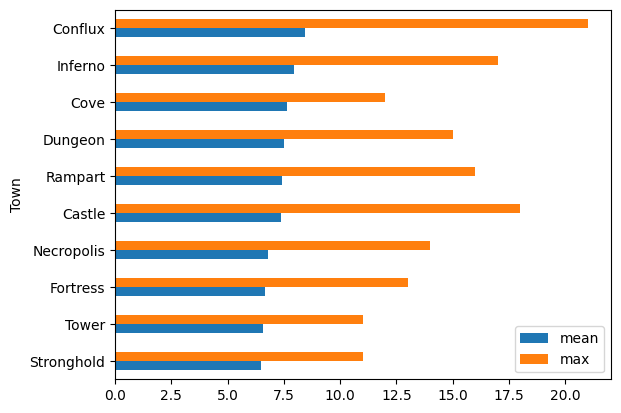

In [130]:
merge.sort_values(by='mean').plot(kind='barh')

In [131]:
df_fortress = df[df['Town'] == 'Fortress']

In [132]:
df_fortress[['Name', 'Spd', 'Upgraded']].sort_values(by='Spd', ascending = False)

,Name,Spd,Upgraded
103,Dragon Fly,13,1
109,Wyvern Monarch,11,1
102,Serpent Fly,9,0
105,Greater Basilisk,7,1
108,Wyvern,7,0
111,Chaos Hydra,7,1
107,Mighty Gorgon,6,1
99,Gnoll Marauder,5,1
101,Lizard Warrior,5,1
104,Basilisk,5,0


### Defence

<Axes: ylabel='Town'>

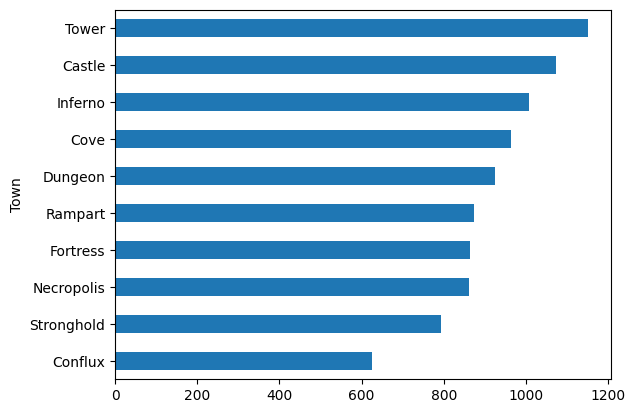

In [144]:
df[(df['Upgraded'] == 1) & (df['Level'] < 8)].groupby('Town')['Cost'].mean().sort_values(ascending = True).plot(kind = 'barh')

In [141]:
df.columns

Index(['Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Grw',
       'Val', 'cum_val', 'Cost', 'Resource', 'Special', 'Ranged', 'Flyer',
       'no_retaliation', 'Upgraded', 'AI Value', 'Fight Value', 'diff_',
       'multi_att', 'poison', 'immunity', 'resistance', 'caster', 'dmg',
       'attdef', 'Grw_total'],
      dtype='object')

In [ ]:
df['total_avalue'] = df['Val'] * df['Grw_total']
df['total_fvalue'] = df['Fight Value'] * df['Grw_total']
df.head()

In [ ]:
df.groupby('Town')['total_avalue'].sum().sort_values(ascending = True).plot(kind = 'barh')

In [ ]:
df['total_avalue_cost'] = round(   (df['AI Value'] / df['Cost'])     * df['Grw_total']      ,0)
df['total_fvalue_cost'] = round(   (df['Fight Value'] / df['Cost'])     *df['Grw_total']      ,0)
df.head()

In [ ]:
df.groupby('Town')['total_fvalue_cost'].sum().sort_values(ascending = True).plot(kind = 'barh')

In [ ]:
df.groupby('Town')['total_avalue_cost'].sum().sort_values(ascending = True).plot(kind = 'barh')

Show me the castles with the highest percentange change between AI Value and Fight Value.

In [ ]:
df.groupby('Town')['diff_'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Overall difference between AI and Fight Value per town')

In [ ]:
dfa = df[['Name', 'attdef', 'dmg', 'HP', 'Spd', 'Cost', 'Ranged', 'Flyer',
       'no_retaliation', 'AI Value', 'Fight Value', 'diff_']]
corr_matrix = dfa.corr(method = 'pearson')
plt.figure(figsize = (9, 5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation matrix')

We can see that Speed, Ranged and Flyer are the most important in explaining the difference between AI value and Fight Value. Hope this will be shown in the linear regression.

In [ ]:
df['range_fly'] = df['Flyer'] + df['Ranged']
dftest = df.copy()

In [ ]:
df.head()

In [ ]:
n = 3.5
m = 7
p = 7.5
dftest2 = dftest[dftest['Level'] == n].reset_index(drop = True)
dftest2 = dftest2.rename(columns={'Fight Value': 'Fight_Value'})
avg_price = dftest2[dftest2['Level'] == n].Cost.mean()
avg_val = dftest2[dftest2['Level'] == n].Val.mean()

In [ ]:
sns.set_theme()
sns.scatterplot(data = dftest2, x = 'Val', y = 'Cost',  hue = 'range_fly', legend = False)
# fit_reg=True
text_objects = []

for line in range(0,dftest2.shape[0]):
     text_objects.append(plt.text(dftest2.Val[line] + 1, dftest2.Cost[line] + 1, dftest2.Name[line],
              horizontalalignment='left',
              verticalalignment='top',
              size='xx-small',
              color='black',
              weight='semibold'))
     adjust_text(text_objects)

plt.xlabel("AI Value")
plt.ylabel("Cost of the unit")
plt.title('Scatterplot AI Value vs Cost of unit')

plt.axhline(y=avg_price, color="red", ls= ":", lw = 0.5)
plt.axvline(x=avg_val, color="red", linestyle=":", lw = 0.5)

In [ ]:
dftest[dftest['Upgraded'] == 1].groupby('Town')['val_per_gold'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Sum of all units of a Town taken as 1 at cost')

In [ ]:
dftest[dftest['Upgraded'] == 1].groupby('Town')['total_val_per_gold'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Value per one week dwelling/gold')

In [ ]:
dftest[dftest['Upgraded'] == 1].groupby('Town')['val_per_gold'].sum().sort_values(ascending = True).plot(kind = 'barh')

In [ ]:
dftest[dftest['Level'] == 5.5].sort_values(by = 'total_value', axis = 0, ascending = False).head(28)

In [ ]:
df[df['Level'] == 7.5].sort_values(by = 'diff_', axis = 0, ascending = False).head(28)

In [ ]:
df.groupby('Town')['diff_'].sum().sort_values(ascending = True).plot(kind = 'barh')

In [ ]:
df[df['Level']==6.5][['Name', 'dmg']].sort_values(by = 'dmg' ,ascending = False)

In [ ]:
n=0.5 + 4

ss = df[df['Level']==n][['Name', 'AI Value', 'diff_','Spd']].sort_values(by = 'Spd' ,ascending = False)
scaler = StandardScaler()
ss_scaled = scaler.fit_transform(ss[['Spd']])
ss['scaled'] = ss_scaled
ss.sort_values(by='scaled', ascending=False)

In [ ]:
df[((df['Level']/0.5) % 2 == 1) & (df['Level'] < 86)].groupby('Town')['Spd'].sum().sort_values(ascending=True).plot(kind = 'barh',figsize = (8,4))

In [ ]:
df.head()

In [ ]:
#CASTLES COSTS

# url1 = 'https://heroes.thelazy.net/index.php/Cove'
# df_resource1 = pd.read_html(url1)
# df_resource2 = df_resource1[1]
# resource = ['gold', 'wood', 'ore', 'crystal', 'gem', 'sulfur', 'mercury', 'troop cost']
# df_resource2['Resource'] = resource
# df_resource2